Specific Example : Exercise 3.5 (Koonin's Ch.3)

Apply the Numerov algorithm to the problem

$$\frac{d^2y}{dx^2}= -4 \times \pi^2 \times y; y(0)=1, y'(0)=0$$
Integrate from x=0 to x=1 with various step sizes and compare the efficiency and accuracy with some of the methods discussed in previous lectures.

0.0 -0.0017149255045213552


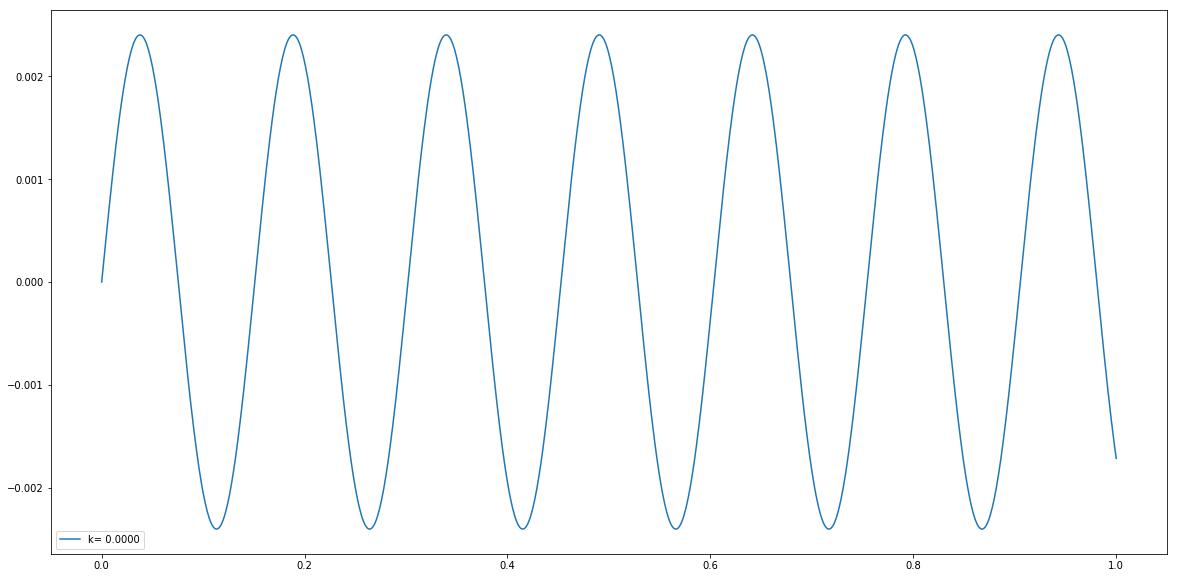

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def numerov(xgrid, y_0, y_1, k, S):
    ngrid = len(xgrid)
    h = xgrid[1] - xgrid[0]
    y = np.zeros(ngrid)
    y[0] = y_0
    y[1] = y_1
    
    for j in np.arange(2, ngrid):
        
        y1 = y[j-2]; y2 = y[j-1]
        k1 = k[j-2]; k2 = k[j-1]; k3 = k[j]
        s1 = S[j-2]; s2 = S[j-1]; s3 = S[j]
        
        term_S = 1/12. * h**2 * (s3 + 10*s2 + s1)
        term_3 = (1 + 1/12. * h**2 * k3**2)
        term_2 = -2 * (1 - 5/12. * 5*h**2 * k2**2) * y2
        term_1 =(1 + 1/12. * h**2 * k1**2) * y1
        
        y3 = (term_S - term_2 - term_1) / term_3
        y[j] = y3
        
    return y

# from x=0 to x=1,
xgrid = np.linspace(0., 1., 1001)
ngrid = len(xgrid)

# initial values (arbitary y_1)
y_0 = 0.0; y_1 = 1e-4

#
# guess k
#

# figure
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(111)

tolerance = 1.e-5 # tolerance for iteration
wn = 1.; dwn = 1. # wavenumer

# Initial solution
k = np.zeros(ngrid); k+= wn
#print (k)
S = np.zeros(ngrid)
y_old = numerov(xgrid, y_0, y_1, k, S)
#fig1.plot(xgrid, y_old)

for j in range(1,21):
    
    # k and S terms
    k = np.zeros(ngrid); k += j
    S = np.zeros(ngrid)
 
    # evaluate y for this k
    y = numerov(xgrid, y_0, y_1, k, S)
    
#    print(j, y[-1])
#    fig1.plot(xgrid, y, label='k=%4.2f' % j)
    
wavenumbers = []
#print (k)
while dwn > tolerance:
    
    # judge the sign change
    if y[-1]*y_old[-1] < 0.0:
        wn = wn - dwn # go backward and
        dwn = dwn/2 # decrease search step size
        
        # get the wavenumber that satisfies boundary conditions.
        if y[-1] < tolerance:
            wavenumbers.append(wn)
            fig1.plot(xgrid, y, label='k=%7.4f' % wn)
            break
        else: pass
    
    y_old = y # update y_old
    
print (wn, y[-1])
    
fig1.legend(loc='lower left')
plt.show()

[1.50917053 1.50917053 1.50917053 ... 1.50917053 1.50917053 1.50917053]
23


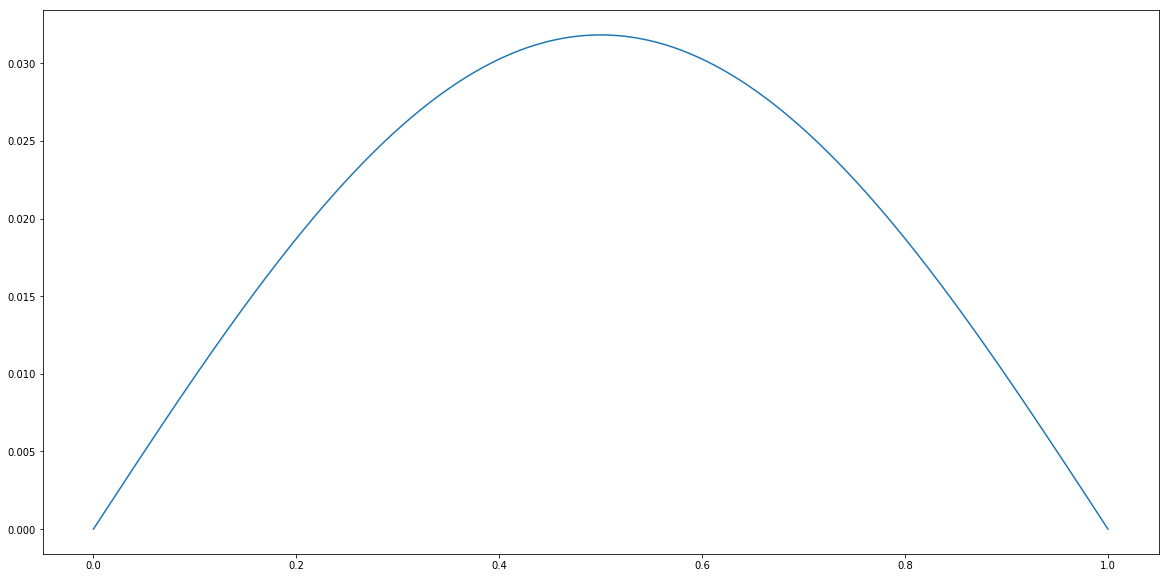

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def numerov(xgrid, y_0, y_1, k, S):
    ngrid = len(xgrid)
    h = xgrid[1] - xgrid[0]
    y = np.zeros(ngrid)
    y[0] = y_0
    y[1] = y_1
    
    for j in np.arange(2, ngrid):
        
        y1 = y[j-2]; y2 = y[j-1]
        k1 = k[j-2]; k2 = k[j-1]; k3 = k[j]
        s1 = S[j-2]; s2 = S[j-1]; s3 = S[j]
        
        term_S = 1/12. * h**2 * (s3 + 10*s2 + s1)
        term_3 = (1 + 1/12. * h**2 * k3**2)
        term_2 = -2 * (1 - 5/12. * 5*h**2 * k2**2) * y2
        term_1 =(1 + 1/12. * h**2 * k1**2) * y1
        
        y3 = (term_S - term_2 - term_1) / term_3
        y[j] = y3
        
    return y

# from x=0 to x=1,
xgrid = np.linspace(0., 1., 1001)
ngrid = len(xgrid)

# initial values (arbitary y_1)
y_0 = 0.0; y_1 = 1e-4

#
# guess k
#

# figure
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(111)

tolerance = 1.e-5 # tolerance for iteration
#wn = 1.; dwn = 1/3. # wavenumer

# Initial solution
k = np.zeros(ngrid); k+= 1
dk = np.zeros(ngrid); dk+= 1
S = np.zeros(ngrid)

y_old = numerov(xgrid, y_0, y_1, k, S)
#print (y_old)
#print (dk)
iteration_counter=0
while abs(dk[0]) > tolerance and iteration_counter < 1000:
    k = k+dk
    #print(k)
    y = numerov(xgrid, y_0, y_1, k, S)
    #print (y)
    if y[-1]*y_old[-1] < 0.0:
        k=k-dk
        dk=dk/2
    #print (k)
    iteration_counter += 1
print (k)
print (iteration_counter)
    
fig1.plot(xgrid, y, label='k=%4.2f' % k[0])
    
#fig1.legend(loc='lower left')
#plt.show()